In [15]:
import pandas as pd
df = pd.read_csv('top_1000_transcripts_adjusted_tpm.csv')
df = df.head(99)
df.to_csv('top_99_deg_transcripts.csv', index=False)


Raw 1197 Transcripts
Training Accuracy: 1.000
Testing Accuracy: 0.440


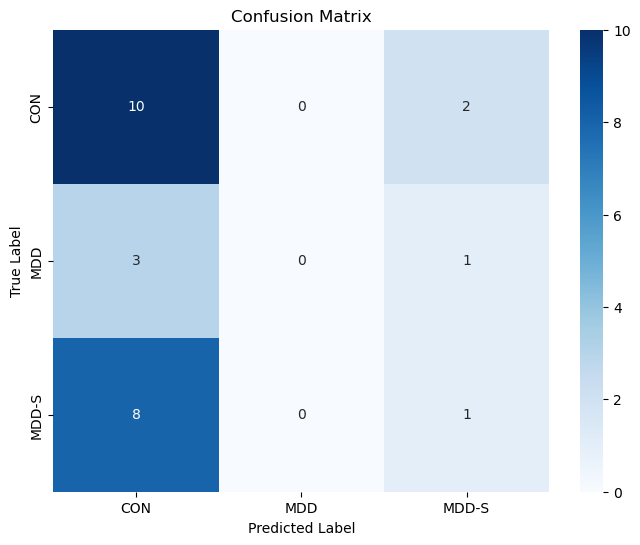

Top 99 DEG Transcripts
Training Accuracy: 1.000
Testing Accuracy: 0.960


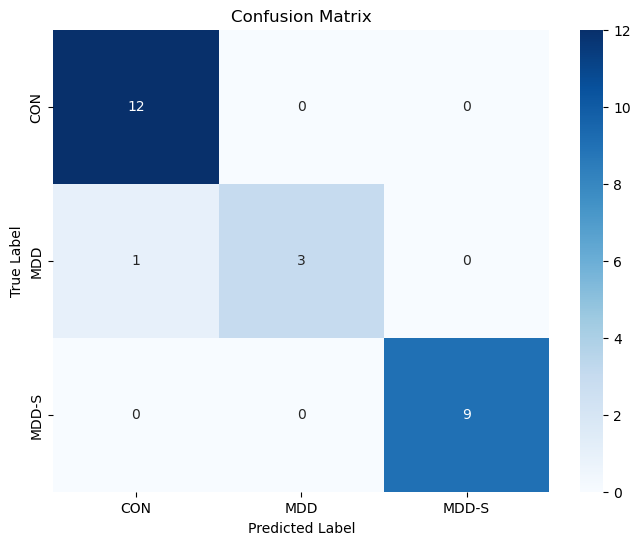

Top 1000 Transcripts


In [67]:
import pandas as pd
import json

# Prepare data for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Generate confusion matrix for test_size 0.2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Read the label mapping
with open('map.json', 'r') as f:
    sample_map = json.load(f)

# Read the CSV file
df = pd.read_csv('log2_transformed_1197_raw_transcripts.csv')

def train_and_evaluate_rf_classifier(df, sample_map):
    df = df.rename(columns={'Unnamed: 0': 'transcript_id'})
    df.set_index('transcript_id', inplace=True)
    # Mean center each row (feature/transcript)
    for index in df.index:
        row_mean = df.loc[index].mean()
        df.loc[index] = df.loc[index] - row_mean

    X = df.transpose()

    # Create multiclass labels (0: CON, 1: MDD, 2: MDD-S)
    y_multiclass = pd.Series(index=df.columns)
    for col in df.columns:
        if sample_map[col] == 'CON':
            y_multiclass[col] = int(0)
        elif sample_map[col] == 'MDD':
            y_multiclass[col] = int(1)
        else:  # MDD-S
            y_multiclass[col] = int(2)
            
    X_con = X[y_multiclass == 0]
    y_con = y_multiclass[y_multiclass == 0]
    X_mdd = X[y_multiclass == 1]
    y_mdd = y_multiclass[y_multiclass == 1]
    X_mdds = X[y_multiclass == 2]
    y_mdds = y_multiclass[y_multiclass == 2]

    # Rerun model with test_size = 0.2 to get confusion matrix
    X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_con, y_con, test_size=0.4, random_state=2)
    X_train_mdd, X_test_mdd, y_train_mdd, y_test_mdd = train_test_split(X_mdd, y_mdd, test_size=0.4, random_state=2)
    X_train_mdds, X_test_mdds, y_train_mdds, y_test_mdds = train_test_split(X_mdds, y_mdds, test_size=0.4, random_state=2)

    X_train = pd.concat([X_train_con, X_train_mdd, X_train_mdds])
    X_test = pd.concat([X_test_con, X_test_mdd, X_test_mdds])
    y_train = pd.concat([y_train_con, y_train_mdd, y_train_mdds])
    y_test = pd.concat([y_test_con, y_test_mdd, y_test_mdds])

    rf_multiclass = RandomForestClassifier(n_estimators=150, random_state=2)
    rf_multiclass.fit(X_train, y_train)
    y_pred = rf_multiclass.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    # Calculate and print accuracies    
    train_accuracy = rf_multiclass.score(X_train, y_train)
    test_accuracy = rf_multiclass.score(X_test, y_test)

    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # Add class labels to axes
    plt.yticks([0.5, 1.5, 2.5], ['CON', 'MDD', 'MDD-S'])
    plt.xticks([0.5, 1.5, 2.5], ['CON', 'MDD', 'MDD-S'])
    plt.show()
    
    return rf_multiclass, train_accuracy, test_accuracy, cm

print("Raw 1197 Transcripts")
df = pd.read_csv('log2_transformed_1197_raw_transcripts.csv')
train_and_evaluate_rf_classifier(df, sample_map)
print("Top 99 DEG Transcripts")
df = pd.read_csv('top_99_deg_transcripts.csv')
train_and_evaluate_rf_classifier(df, sample_map)

print("Top 1000 Transcripts")


Raw 1197 Transcripts
Training Accuracy: 0.794
Testing Accuracy: 0.360


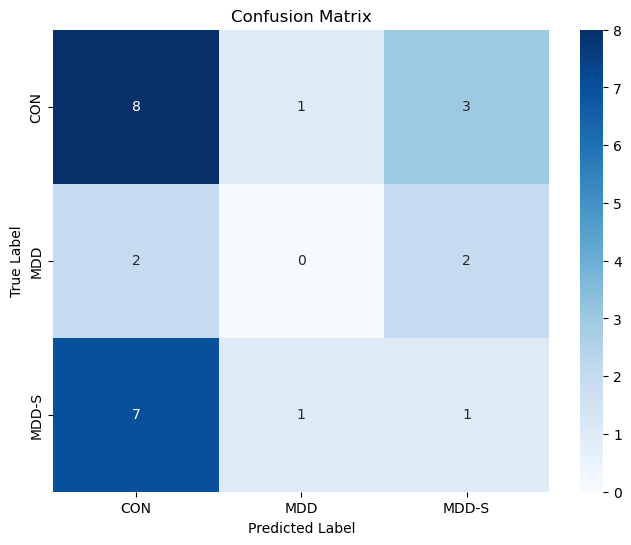

Top 99 DEG Transcripts
Training Accuracy: 0.706
Testing Accuracy: 0.480


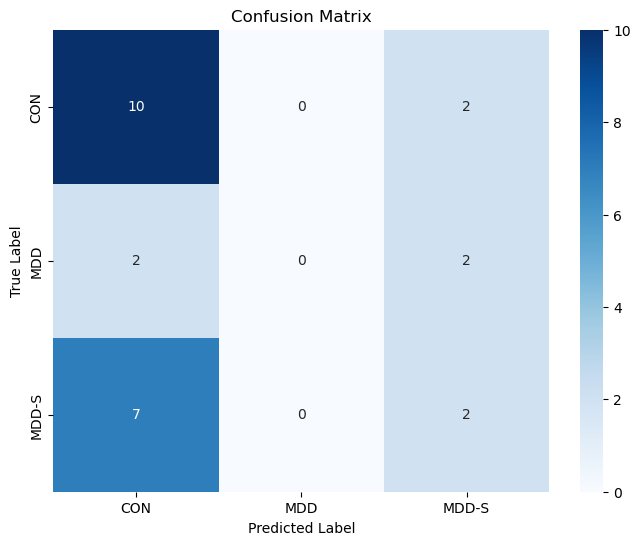

In [72]:

def train_and_evaluate_knn_classifier(df, sample_map):
    df = df.rename(columns={'Unnamed: 0': 'transcript_id'})
    df.set_index('transcript_id', inplace=True)
    # Mean center each row (feature/transcript)
    for index in df.index:
        row_mean = df.loc[index].mean()
        df.loc[index] = df.loc[index] - row_mean

    X = df.transpose()

    # Create multiclass labels (0: CON, 1: MDD, 2: MDD-S)
    y_multiclass = pd.Series(index=df.columns)
    for col in df.columns:
        if sample_map[col] == 'CON':
            y_multiclass[col] = int(0)
        elif sample_map[col] == 'MDD':
            y_multiclass[col] = int(1)
        else:  # MDD-S
            y_multiclass[col] = int(2)
            
    X_con = X[y_multiclass == 0]
    y_con = y_multiclass[y_multiclass == 0]
    X_mdd = X[y_multiclass == 1]
    y_mdd = y_multiclass[y_multiclass == 1]
    X_mdds = X[y_multiclass == 2]
    y_mdds = y_multiclass[y_multiclass == 2]

    # Rerun model with test_size = 0.2 to get confusion matrix
    X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_con, y_con, test_size=0.4, random_state=3)
    X_train_mdd, X_test_mdd, y_train_mdd, y_test_mdd = train_test_split(X_mdd, y_mdd, test_size=0.4, random_state=3)
    X_train_mdds, X_test_mdds, y_train_mdds, y_test_mdds = train_test_split(X_mdds, y_mdds, test_size=0.4, random_state=3)

    X_train = pd.concat([X_train_con, X_train_mdd, X_train_mdds])
    X_test = pd.concat([X_test_con, X_test_mdd, X_test_mdds])
    y_train = pd.concat([y_train_con, y_train_mdd, y_train_mdds])
    y_test = pd.concat([y_test_con, y_test_mdd, y_test_mdds])

    knn_binary = KNeighborsClassifier(n_neighbors=2)
    knn_binary.fit(X_train, y_train)
    y_pred = knn_binary.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    # Calculate and print accuracies
    
    train_accuracy = knn_binary.score(X_train, y_train)
    test_accuracy = knn_binary.score(X_test, y_test)
    
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # Add class labels to axes
    plt.yticks([0.5, 1.5, 2.5], ['CON', 'MDD', 'MDD-S'])
    plt.xticks([0.5, 1.5, 2.5], ['CON', 'MDD', 'MDD-S'])
    plt.show()

print("Raw 1197 Transcripts")
df = pd.read_csv('log2_transformed_1197_raw_transcripts.csv')
train_and_evaluate_knn_classifier(df, sample_map)
print("Top 99 DEG Transcripts")
df = pd.read_csv('top_99_deg_transcripts.csv')
train_and_evaluate_knn_classifier(df, sample_map)


In [33]:
def train_and_evaluate_rf_classifier_test_size(df, sample_map):
    df = df.rename(columns={'Unnamed: 0': 'transcript_id'})
    df.set_index('transcript_id', inplace=True)
    # Mean center each row (feature/transcript)
    for index in df.index:
        row_mean = df.loc[index].mean()
        df.loc[index] = df.loc[index] - row_mean

    X = df.transpose()

    # Create multiclass labels (0: CON, 1: MDD, 2: MDD-S)
    y_multiclass = pd.Series(index=df.columns)
    for col in df.columns:
        if sample_map[col] == 'CON':
            y_multiclass[col] = int(0)
        elif sample_map[col] == 'MDD':
            y_multiclass[col] = int(1)
        else:  # MDD-S
            y_multiclass[col] = int(2)

    # Test different split sizes
    test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]
    results = []

    for test_size in test_sizes:
        iteration_scores = []
        
        # Run multiple iterations for each test size
        for i in range(10):
            # Split data for each class
            X_con = X[y_multiclass == 0]
            y_con = y_multiclass[y_multiclass == 0]
            X_mdd = X[y_multiclass == 1]
            y_mdd = y_multiclass[y_multiclass == 1]
            X_mdds = X[y_multiclass == 2]
            y_mdds = y_multiclass[y_multiclass == 2]

            # Split each class into train/test
            X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_con, y_con, test_size=test_size, random_state=i)
            X_train_mdd, X_test_mdd, y_train_mdd, y_test_mdd = train_test_split(X_mdd, y_mdd, test_size=test_size, random_state=i)
            X_train_mdds, X_test_mdds, y_train_mdds, y_test_mdds = train_test_split(X_mdds, y_mdds, test_size=test_size, random_state=i)

            # Combine the splits
            X_train = pd.concat([X_train_con, X_train_mdd, X_train_mdds])
            X_test = pd.concat([X_test_con, X_test_mdd, X_test_mdds])
            y_train = pd.concat([y_train_con, y_train_mdd, y_train_mdds])
            y_test = pd.concat([y_test_con, y_test_mdd, y_test_mdds])

            # Train Random Forest classifier
            rf_multiclass = RandomForestClassifier(n_estimators=100, random_state=42)
            rf_multiclass.fit(X_train, y_train)

            # Make predictions and get classification report
            y_pred = rf_multiclass.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=['CON', 'MDD', 'MDD-S'], output_dict=True, zero_division=0)
            
            iteration_scores.append({
                'accuracy': report['accuracy'],
                'con_f1': report['CON']['f1-score'],
                'mdd_f1': report['MDD']['f1-score'],
                'mdds_f1': report['MDD-S']['f1-score']
            })
        
        # Calculate mean scores for current test_size
        mean_scores = {
            'test_size': test_size,
            'mean_accuracy': np.mean([x['accuracy'] for x in iteration_scores]),
            'std_accuracy': np.std([x['accuracy'] for x in iteration_scores]),
            'mean_con_f1': np.mean([x['con_f1'] for x in iteration_scores]),
            'mean_mdd_f1': np.mean([x['mdd_f1'] for x in iteration_scores]),
            'mean_mdds_f1': np.mean([x['mdds_f1'] for x in iteration_scores])
        }
        results.append(mean_scores)

    # Print results
    print("\nResults across different test sizes:")
    print("-" * 100)
    print("Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score")
    print("-" * 100)
    for r in results:
        print(f"{r['test_size']:.1f}      | {r['mean_accuracy']:.3f} ± {r['std_accuracy']:.3f}    | {r['mean_con_f1']:.3f}      | {r['mean_mdd_f1']:.3f}      | {r['mean_mdds_f1']:.3f}")

# Read the transcripts data
df = pd.read_csv("log2_transformed_1197_raw_transcripts.csv")
train_and_evaluate_rf_classifier_test_size(df, sample_map)

print("Top 99 DEG Transcripts")
df = pd.read_csv("top_99_deg_transcripts.csv")
train_and_evaluate_rf_classifier_test_size(df, sample_map)



Results across different test sizes:
----------------------------------------------------------------------------------------------------
Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score
----------------------------------------------------------------------------------------------------
0.2      | 0.385 ± 0.129    | 0.516      | 0.000      | 0.230
0.3      | 0.400 ± 0.059    | 0.530      | 0.000      | 0.255
0.4      | 0.440 ± 0.054    | 0.567      | 0.000      | 0.278
0.5      | 0.419 ± 0.058    | 0.535      | 0.029      | 0.312
0.6      | 0.446 ± 0.097    | 0.562      | 0.022      | 0.324
Top 99 DEG Transcripts

Results across different test sizes:
----------------------------------------------------------------------------------------------------
Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score
----------------------------------------------------------------------------------------------------
0.2      | 0.992 ± 0.023 

In [73]:

from sklearn.neighbors import KNeighborsClassifier
def train_and_evaluate_knn_classifier_test_size(df, sample_map):
    df = df.rename(columns={'Unnamed: 0': 'transcript_id'})
    df.set_index('transcript_id', inplace=True)
    # Mean center each row (feature/transcript)
    for index in df.index:
        row_mean = df.loc[index].mean()
        df.loc[index] = df.loc[index] - row_mean

    X = df.transpose()

    # Create multiclass labels (0: CON, 1: MDD, 2: MDD-S)
    y_multiclass = pd.Series(index=df.columns)
    for col in df.columns:
        if sample_map[col] == 'CON':
            y_multiclass[col] = int(0)
        elif sample_map[col] == 'MDD':
            y_multiclass[col] = int(1)
        else:  # MDD-S
            y_multiclass[col] = int(2)
    results_knn = []
    # Loop through different test sizes
    for test_size in [0.2, 0.3, 0.4, 0.5, 0.6]:
        iteration_scores = []
        
        # Perform multiple iterations
        for i in range(10):
            X_con = X[y_multiclass == 0]
            y_con = y_multiclass[y_multiclass == 0]
            X_mdd = X[y_multiclass == 1]
            y_mdd = y_multiclass[y_multiclass == 1]
            X_mdds = X[y_multiclass == 2]
            y_mdds = y_multiclass[y_multiclass == 2]
            
            # Split data for each class
            X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_con, y_con, test_size=test_size, random_state=i)
            X_train_mdd, X_test_mdd, y_train_mdd, y_test_mdd = train_test_split(X_mdd, y_mdd, test_size=test_size, random_state=i)
            X_train_mdds, X_test_mdds, y_train_mdds, y_test_mdds = train_test_split(X_mdds, y_mdds, test_size=test_size, random_state=i)

            # Combine the splits
            X_train = pd.concat([X_train_con, X_train_mdd, X_train_mdds])
            X_test = pd.concat([X_test_con, X_test_mdd, X_test_mdds])
            y_train = pd.concat([y_train_con, y_train_mdd, y_train_mdds])
            y_test = pd.concat([y_test_con, y_test_mdd, y_test_mdds])

            # Train KNN classifier
            knn_multiclass = KNeighborsClassifier(n_neighbors=2)
            knn_multiclass.fit(X_train, y_train)

            # Make predictions and get classification report
            y_pred = knn_multiclass.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=['CON', 'MDD', 'MDD-S'], output_dict=True, zero_division=0)
            
            iteration_scores.append({
                'accuracy': report['accuracy'],
                'con_f1': report['CON']['f1-score'],
                'mdd_f1': report['MDD']['f1-score'],
                'mdds_f1': report['MDD-S']['f1-score']
            })
        
        # Calculate mean scores for current test_size
        mean_scores = {
            'test_size': test_size,
            'mean_accuracy': np.mean([x['accuracy'] for x in iteration_scores]),
            'std_accuracy': np.std([x['accuracy'] for x in iteration_scores]),
            'mean_con_f1': np.mean([x['con_f1'] for x in iteration_scores]),
            'mean_mdd_f1': np.mean([x['mdd_f1'] for x in iteration_scores]),
            'mean_mdds_f1': np.mean([x['mdds_f1'] for x in iteration_scores])
        }
        results_knn.append(mean_scores)

    # Print KNN results
    print("\nKNN Results across different test sizes:")
    print("-" * 100)
    print("Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score")
    print("-" * 100)
    for r in results_knn:
        print(f"{r['test_size']:.1f}      | {r['mean_accuracy']:.3f} ± {r['std_accuracy']:.3f}    | {r['mean_con_f1']:.3f}      | {r['mean_mdd_f1']:.3f}      | {r['mean_mdds_f1']:.3f}")


df = pd.read_csv("log2_transformed_1197_raw_transcripts.csv")
train_and_evaluate_knn_classifier_test_size(df, sample_map)

print("Top 99 DEG Transcripts")
df = pd.read_csv("top_99_deg_transcripts.csv")
train_and_evaluate_knn_classifier_test_size(df, sample_map)


KNN Results across different test sizes:
----------------------------------------------------------------------------------------------------
Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score
----------------------------------------------------------------------------------------------------
0.2      | 0.385 ± 0.129    | 0.534      | 0.067      | 0.194
0.3      | 0.405 ± 0.127    | 0.553      | 0.050      | 0.225
0.4      | 0.452 ± 0.072    | 0.599      | 0.033      | 0.294
0.5      | 0.461 ± 0.046    | 0.601      | 0.025      | 0.336
0.6      | 0.449 ± 0.049    | 0.591      | 0.033      | 0.297
Top 99 DEG Transcripts

KNN Results across different test sizes:
----------------------------------------------------------------------------------------------------
Test Size | Accuracy (mean ± std) | CON F1-score | MDD F1-score | MDD-S F1-score
----------------------------------------------------------------------------------------------------
0.2      | 0.377 